Original dataset shapes: (290, 2) (290,)
Train/test sets shapes: (203, 2) (87, 2)
Accuracy: 0.5517 [ours]
Accuracy: 0.5517 [sklearn]
              precision    recall  f1-score   support

         0.0       0.61      0.72      0.66        53
         1.0       0.40      0.29      0.34        34

    accuracy                           0.55        87
   macro avg       0.51      0.51      0.50        87
weighted avg       0.53      0.55      0.54        87

Accuracy: 0.5747 [ours]
Accuracy: 0.5747 [sklearn]
              precision    recall  f1-score   support

         0.0       0.63      0.74      0.68        53
         1.0       0.44      0.32      0.37        34

    accuracy                           0.57        87
   macro avg       0.53      0.53      0.53        87
weighted avg       0.56      0.57      0.56        87

Accuracy: 0.5402 [ours]
Accuracy: 0.5402 [sklearn]
              precision    recall  f1-score   support

         0.0       0.60      0.75      0.67        53
  

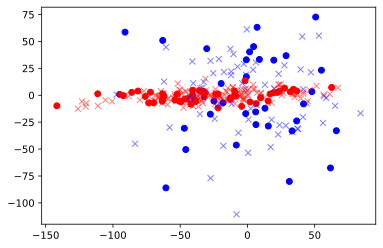

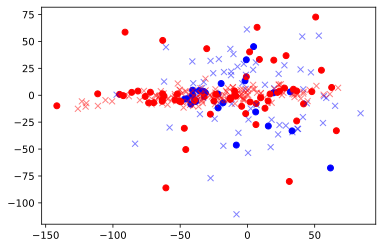

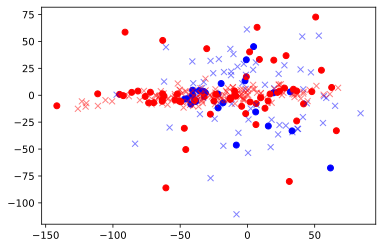

In [1]:
# coding: utf-8
"""
    Задание: ближайшие соседи, синтетический датасет, Евклидово расстояние.

    В задании требуется реализовать метод ближайших соседей для двух классов
    с параметризуемым числом соседей.

    Рекомендую начинать разбираться с кодом -- после if __name__ == "__main__",
    а потом уже переходить к accuracy и классу KNN.
"""
import numpy as np
from typing import SupportsIndex
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import classification_report, accuracy_score
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')


class KNN(object):
    """
        Класс с реализацией метода ближайших соседей.
    """

    def __init__(self, n_neighbours: int = 4):
        # обучающая выборка: признаки
        self.X_train = None

        # обучающая выборка: метки классов
        self.y_train = None

        # число ближайших соседей
        self.n_neighbours = n_neighbours

    def fit(self, X: np.ndarray, y: SupportsIndex):
        """
            В методе fit (по аналогии с API sklearn) происходит обучение модели.
            Здесь как такового обучения у нас нет, надо просто запомнить датасет
            как "состояние объекта" KNN.
        """
        self.X_train = X
        self.y_train = y

    def predict(self, X: np.ndarray) -> np.ndarray:
        distances = self.X_train[:,np.newaxis] - X[np.newaxis,:]
        distances = np.sqrt(np.sum(distances ** 2, axis=-1))
        
        neighs_mask = np.argsort(distances, axis=0) < self.n_neighbours
        
        y_neighs = np.array([self.y_train[row] for row in neighs_mask.T])
        y_most_commons = np.apply_along_axis(lambda x: Counter(x).most_common(1)[0][0], 1, y_neighs)
        return y_most_commons



def accuracy(labels_true: np.ndarray, labels_predicted: np.ndarray):
    """
        Доля верно предсказанных меток; это ценная, но далеко не лучшая (почему?)
        оценка качества классификации, но давайте её реализуем
    :param labels_true: одномерный массив int-ов, истинные метки
    :param labels_predicted: одномерный массив int-ов, предсказанные метки
    :return: число совпавших меток делим на общее число меток
    """
    total_matches = np.sum((labels_true == labels_predicted))
    size = labels_true.size
    return total_matches / size



if __name__ == "__main__":

    # фиксируем random seed для воспроизводимости результата
    np.random.seed(104)

    # создаём синтетический набор данных для обучения и тестирования
    means0 = [-30, -1]
    covs0 = [[1710, 100.8],
             [100.8, 30.1]]
    x0, y0 = np.random.multivariate_normal(means0, covs0, 190).T

    means1 = [0, -1]
    covs1 = [[1500, 0.0],
             [0.0, 1200]]
    x1, y1 = np.random.multivariate_normal(means1, covs1, 100).T

    # можете раскомментировать и посмотреть, как выглядят данные
    # plt.plot(x0, y0, marker='o', color='b', ls='')
    # plt.plot(x1, y1, marker='o', color='r', ls='')
    # plt.show()
    # quit()

    # как работают hstack и vstack?
    # https://numpy.org/doc/stable/reference/generated/numpy.hstack.html

    # если непонятно, что здесь происходит, распечатайте массивы,
    # а лучше .shape каждого из них
    data0 = np.vstack([x0, y0]).T
    labels0 = np.zeros(data0.shape[0])

    data1 = np.vstack([x1, y1]).T
    labels1 = np.ones(data1.shape[0])

    data = np.vstack([data0, data1])
    labels = np.hstack([labels0, labels1])
    total_size = data.shape[0]
    print("Original dataset shapes:", data.shape, labels.shape)

    # берём случайные 70% как train
    train_size = int(total_size * 0.7)
    indices = np.random.permutation(total_size)

    # обратите внимание на возможность объявлять несколько переменных в одной строке,
    # бывает удобно, особенно когда переменные связаны по смыслу и когда в правой части короткие выражения
    X_train, y_train = data[indices][:train_size], labels[indices][:train_size]
    X_test, y_test = data[indices][train_size:], labels[indices][train_size:]
    print("Train/test sets shapes:", X_train.shape, X_test.shape)

    for n_neighbours in range(1, 6):
        # создаём объект-классификатор
        predictor = KNN(n_neighbours)

        # выбор гиперпараметров (здесь это n_neighbours) так, чтобы модель не переобучилась, --
        # отдельная история; в этом задании нас это волновать не будет
        predictor.fit(X_train, y_train)
        y_pred = predictor.predict(X_test)

        print("Accuracy: %.4f [ours]" % accuracy(y_test, y_pred))

    #     сверьте значение с оценкой из сторонней библиотеки
        print("Accuracy: %.4f [sklearn]" % accuracy_score(y_test, y_pred))

    #     удобный инструмент из sklearn, который посчитает некоторые другие стандартные метрики за вас
        print(classification_report(y_test, y_pred))
    
    predictor1 = KNN(n_neighbours=1)
    predictor1.fit(X_train, y_train)
    y_pred1 = predictor1.predict(X_test)
    
    predictor5 = KNN(n_neighbours=5)
    predictor5.fit(X_train, y_train)
    y_pred5 = predictor1.predict(X_test)
    
    plt.plot(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], marker='o', color='b', ls='')
    plt.plot(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], marker='o', color='r', ls='')
    
    plt.plot(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], marker='x', color='b', ls='', alpha=0.5)
    plt.plot(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], marker='x', color='r', ls='', alpha=0.5)
    plt.savefig("picture1.svg")
    plt.show()

    plt.plot(X_test[y_pred1 == 1][:, 0], X_test[y_pred1 == 1][:, 1], marker='o', color='b', ls='')
    plt.plot(X_test[y_pred1 == 0][:, 0], X_test[y_pred1 == 0][:, 1], marker='o', color='r', ls='')
    
    plt.plot(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], marker='x', color='b', ls='', alpha=0.5)
    plt.plot(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], marker='x', color='r', ls='', alpha=0.5)
    plt.savefig("picture2.svg")
    plt.show()
    
    plt.plot(X_test[y_pred5 == 1][:, 0], X_test[y_pred5 == 1][:, 1], marker='o', color='b', ls='')
    plt.plot(X_test[y_pred5 == 0][:, 0], X_test[y_pred5 == 0][:, 1], marker='o', color='r', ls='')
    
    plt.plot(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], marker='x', color='b', ls='', alpha=0.5)
    plt.plot(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], marker='x', color='r', ls='', alpha=0.5)
    plt.savefig("picture3.svg")
    plt.show()
